### Simple Linear Regression
- y=mx+c
- one independent and one dependent variable

![formula](slopeandintercept.jpg)

- R2 Formula
![R2](r2.png)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
### Reading the dataset
data=pd.read_csv("advertising.csv")

In [5]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
#removing the unwanted coloumn
data.drop("Unnamed: 0",axis=1,inplace=True)

In [9]:
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [32]:
# collect the X and Y
x=data["TV"].values
x.shape

(200,)

In [33]:
y=data["sales"].values
y.shape

(200,)

In [34]:
### Calculating the coefficient
##Mean of x and y
mean_x=np.mean(x)
print(mean_x)
mean_y=np.mean(y)
print(mean_y)

147.0425
14.0225


In [35]:
### Total no of values
n=len(x)
n

200

In [36]:
##y=b0+b1x
##b0=y-b1x
## calculate the b1 and b0
numer=0
denom=0
for i in range(n):
    numer += (x[i]-mean_x)*(y[i]-mean_y)
    denom += (x[i]-mean_x)**2
b1=numer/denom
b0=mean_y-(b1*mean_x)
print(b1)
print(b0)

0.04753664043301969
7.032593549127704


In [37]:
print("The linear equation is: y={:.4}x+{:.5}".format(b1,b0))

The linear equation is: y=0.04754x+7.0326


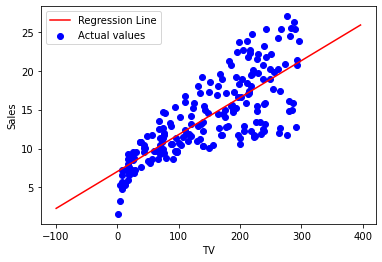

In [38]:
# plotting the values and regression line
max_x=np.max(x)+100
min_x=np.min(x)-100
#print(max_x,min_x)
x1=np.linspace(min_x,max_x,1000)
y1=b0+b1*x1

plt.plot(x1,y1,color="red",label="Regression Line")
plt.scatter(x,y,c="Blue",label="Actual values")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend(loc="best")
plt.show()

In [39]:
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [40]:
y_pred=b0+b1*x[2]
y_pred

7.8502237645756425

In [42]:
#Determination coefficient(R2)--(0 to 1)
ss_tot=0
ss_res=0
for i in range(n):
    y_pred=b0+b1*x[i]
    ss_res += (y[i]-y_pred)**2
    ss_tot += (y[i]-mean_y)**2
r2=1-(ss_res/ss_tot)
print(r2)

0.6118750508500708


In [43]:
### Using Sklearn
from sklearn.linear_model import LinearRegression
x=data["TV"].values.reshape(-1,1)
y=data["sales"].values.reshape(-1,1)
reg=LinearRegression()   #Aplying the data to the model
reg.fit(x,y)                  #fit the data

LinearRegression()

In [44]:
print(reg.coef_)

[[0.04753664]]


In [45]:
print(reg.intercept_)

[7.03259355]


In [49]:
reg.predict([[230.1]])

array([[17.97077451]])

In [52]:
pred=reg.predict(x)
pred

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431],
       [10.17476548],
       [17.23871025],
       [ 8.16396559],
       [11.66741599],
       [16.73482186],
       [16.32125309],
       [10.25557777],
       [20.40940417],
       [10.32212907],
       [14.03474068],
       [17.41459582],
       [18.31779199],
       [ 7.6600772 ],
       [17.88520856],
       [ 9.99412625],
       [19.52997632],
       [13.82557947],
       [18.44614092],
       [18.85970969],
       [10.38868036],
       [20.95607553],
       [12.39948025],
       [11.653155  ],
       [19.65832525],
       [11.58185004],
       [20.85149492],
       [19.72012288],
       [10.58358059],
       [ 9.08142275],
       [17.87094757],
       [16.65876324],
       [15.44657891],
       [20.98935118],
       [16.86792445],
       [ 8.22576322],
       [15

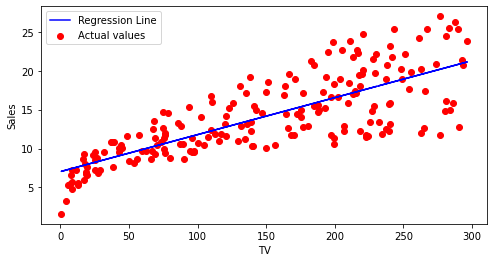

In [53]:
plt.figure(figsize=(8,4))
plt.scatter(data["TV"],data["sales"],c="red",label="Actual values")
plt.plot(data["TV"],pred,c="Blue",label="Regression Line")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend(loc="best")
plt.show()

In [55]:
### R2 score
r2=reg.score(x,y)
print("R2 score:",r2)

R2 score: 0.611875050850071


In [57]:
# Take the Headbrain.csv data
# Apply the linearregression 
# r2,b0,b1
df=pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Regression/headbrain.csv")
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [58]:
df.isna().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [66]:
x=df["Head Size(cm^3)"].values.reshape(-1,1)
x.shape

(237, 1)

In [65]:
y=df["Brain Weight(grams)"].values
y.shape

(237,)

In [67]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()   #Aplying the data to the model
reg.fit(x,y)   

LinearRegression()

In [69]:
reg.predict([[4512]])

array([1514.16660083])

In [70]:
reg.score(x,y)

0.639311719957

In [71]:
reg.intercept_

325.5734210494428

In [72]:
reg.coef_

array([0.26342934])

In [74]:
pred=reg.predict(x)

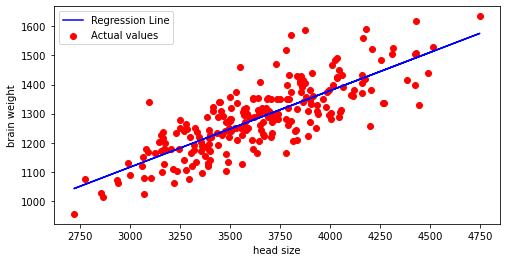

In [75]:
plt.figure(figsize=(8,4))
plt.scatter(df["Head Size(cm^3)"],df["Brain Weight(grams)"],c="red",label="Actual values")
plt.plot(df["Head Size(cm^3)"],pred,c="Blue",label="Regression Line")
plt.xlabel("head size")
plt.ylabel("brain weight")
plt.legend(loc="best")
plt.show()